___
# Atividade: Uso da Distribuição Amostral da Média via resultado do TLC
___

## Aula 18 - Atividade

<div id="indice"></div>

## Índice

- [Teoria](#teoria)
- [Simulação](#simulacao)
    - [Exercício 1](#ex1)
    - [Visualizando os dados gerados](#visualizando)
    - [Exercício 2](#ex2)
    - [Exercício 3](#ex3)
    - [Exercício 4](#ex4)
    - [Exercício 5](#ex5)
- [Tomando decisões com o TLC](#tomando-decisoes)
    - [Exercício 6](#ex6)
    - [Exercício 7](#ex7)
    - [Exercício 8](#ex8)
___

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

<div id="teoria"></div>

# Teoria

## Estatísticas e distribuições amostrais

Uma **estatística** é qualquer função baseada nas observações de uma amostra aleatória. Usamos estatísticas quando, para fins práticos, não é possível ter acesso a toda uma população.

A distribuição de probabilidades de uma estatística é chamada de *distribuição amostral*.


## Média Amostral $\overline{X}$

Assuma que $X$ seja uma variável aleatória com média $\mu$ e variância $\sigma^2$, ou seja, $E(X)=\mu$ e $Var(X)=\sigma^2$.

Sejam $X_1, X_2, \ldots, X_n$ amostras aleatórias de $X$ de tamanho $n$, então:

$$\overline{X} = \frac{X_1 + X_2 + X_3 + \cdots + X_n}{n}$$

É chamada *Média Amostral*!

Pode-se caracterizar a média amostral com os seguintes valores:

* Média de $\overline{X}$:

$$\mu_{\overline{X}} = E(\overline{X})=\frac{\mu + \mu + \cdots + \mu}{n} = \mu$$

* Variância de $\overline{X}$:


$$\sigma^2_{\overline{X}} = Var(\overline{X})=\frac{\sigma^2 + \sigma^2 + \cdots + \sigma^2}{n^2} = \frac{\sigma^2}{n}$$


<br>

## Teorema  Central do Limite (TLC)

Assuma que $X$ seja uma variável aleatória com média $\mu$ e variância $\sigma^2$, ou seja, $E(X)=\mu$ e $Var(X)=\sigma^2$.

Dado $X_i$ uma variável aleatória *i.i.d.* (independente e identicamente distribuída) a $X$ com distribuição qualquer, tem-se que:

$$\bar{X}=\frac{X_1+X_2+...+X_n}{n}=\frac{\sum_{i=1}^n X_i}{n} \sim N\left(\mu,\frac{\sigma^2}{n}\right),$$

quando $n$ for suficientemente grande.

*Obs:* Em alguns casos específicos, pode-se considerar $X_i$ com distribuições diferentes ou com certa dependência entre elas.

<br> 

**Resultado adicional:**

Se $X_1, X_2, \cdots, X_n$ é uma amostra aleatória de tamanho $n$ extraída de uma população com média $\mu$ e variância $\sigma^2$ e $\overline{X}$ é a distribuição da média amostral, a forma limite da distribuição:

$$Z = \frac{\overline{X} - \mu}{\sigma/\sqrt{n}} \sim N\left(0,1\right).$$

É a **distribuição normal padrão**, à medida que $n  \rightarrow \infty$.

___
<div id="simulacao"></div>

# Simulação

Vamos tentar entender a intuição do TLC através de uma simulação.

<div id="ex1"></div>

### EXERCÍCIO 1

Faça uma função chamada `amostra_uniforme(n)`, que recebe um número inteiro `n` e que retorna uma lista contendo `n` valores gerados aleatoriamente a partir de uma distribuição uniforme com parâmetros $a=10$, $b=20$. 

Esses `n` valores representam uma amostra aleatória qualquer extraída de $X\sim \text{Uniforme}(10;20)$.

**Dica:** você provavelmente vai utilizar o método `stats.uniform.rvs` (pesquise a documentação).

In [2]:
# ESCREVA SEU CÓDIGO AQUI
def amostra_uniforme(n):
    return stats.uniform.rvs(loc=10, scale=10, size=n)

___
<div id="visualizando"></div>

## Visualizando os dados gerados

Execute a função `amostra_uniforme(n)` criada no exercício anterior considerando `n=20`.

O gráfico a seguir contem um histograma com os valores da amostra gerados por sua função.

Execute algumas vezes a célula abaixo para perceber que a amostra pode conter valores diferentes.

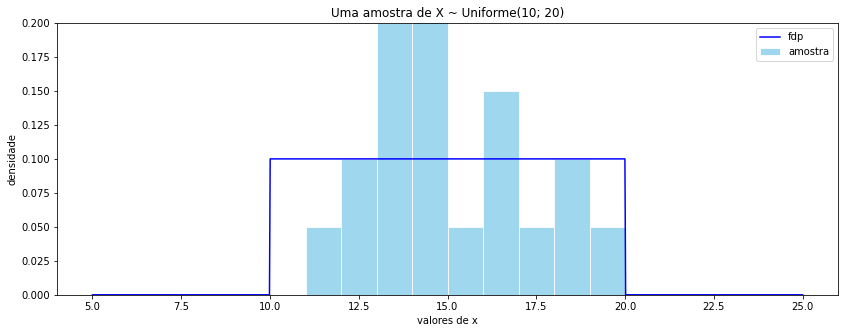

In [4]:
# Gera uma amostra aleatória de tamanho n
amostra = pd.Series(amostra_uniforme(20))

plt.figure(figsize=(14, 5))

# Para construir o histograma com amplitude 1 nas faixas
faixa = np.arange(10,21,1)
plt.hist(amostra, bins=faixa, density=True,
         color='skyblue', edgecolor='white', 
         linewidth=1, alpha=0.8)

# Para construir a fdp 
eixo_x = np.linspace(5, 25, 1000)
fx_uniform = stats.uniform.pdf(eixo_x, loc=10, scale=20-10)
plt.plot(eixo_x, fx_uniform, color='blue')
plt.ylabel('densidade')
plt.xlabel('valores de x')
plt.title('Uma amostra de X ~ Uniforme(10; 20)')
plt.ylim(0,0.2)
plt.legend(('fdp','amostra'))

plt.show()


<div id="ex2"></div>

### EXERCÍCIO 2

Gere um amostra aleatória de tamanho `n=20` utilizando a sua função `amostra_uniforme`.
Calcule a média amostral e desvio padrão amostral.

In [24]:
# ESCREVA SEU CÓDIGO AQUI
amostra = amostra_uniforme(20)
amostra.mean(), amostra.std()

(14.855625407536143, 3.0555436341266606)

<div id="ex3"></div>

### EXERCÍCIO 3

**a.** Agora repita o [Exercício 2](#ex2) mil vezes, armazenando as mil médias em uma lista.

**b.** Plote um histograma com as médias obtidas. Utilize `bins=20`, por exemplo.

**c.** Interprete a distribuição dessas médias amostrais.

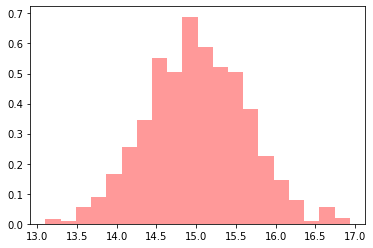

In [34]:
medias = [amostra_uniforme(20).mean() for _ in range(1001)]
medias = np.array(medias)
plt.hist(medias, density=True, bins=20, color="r", alpha=0.4)
plt.show()

<div id="ex4"></div>

### EXERCÍCIO 4

No [Exercício 1](#ex1), a sua função `amostra_uniforme(n)` foi constuída para gerar `n` valores para representar uma amostra aleatória qualquer. Ou seja, de forma teórica $X_1, X_2, X_3, \ldots, X_n$ é uma amostra aleatória de $X\sim \text{Uniforme}(10; 20)$.

No [Exercício 2](#ex2), calculamos uma única média amostral a partir dos valores $X_1, X_2, X_3, \ldots, X_n$. Nos nossos exemplos utilizamos `n=20`.

No [Exercício 3a](#ex3), geramos 1000 amostras de tamanho `n=20` e, com isso, foram calculadas 1000 médias amostrais, $\overline{X}$, todas obtidas de forma independente e da mesma distribuição. 

O que podemos observar no histograma é que essas 1000 médias amostrais se aproximam de uma distribuição simétrica. Seria uma distribuição normal?

Faça um *QQPlot* para avaliar, descritivamente, se as médias seguem uma distribuição normal.
Consulte [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html).

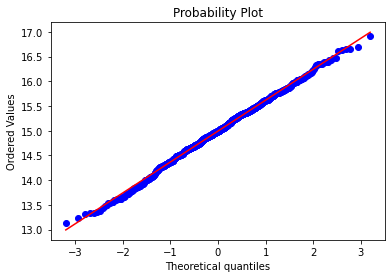

In [27]:
# ESCREVA SEU CÓDIGO AQUI
stats.probplot(medias, plot=plt)
plt.show()

<div id="ex5"></div>

### EXERCÍCIO 5

Pelo TLC, as médias amostrais $\overline{X}$ devem seguir distribuição normal conforme `n` seja grande. Há estudos que mostram que, com `n>30`, $\overline{X}$ já apresenta boa aproximação de uma normal não importando o formato de $X$.

Ainda, pelo TLC, $\overline{X}$ tem valor médio igual a $\mu$ (que é a média da distribuição original $X$, no caso da uniforme) e variância $\sigma^2/n$. Vamos verificar essa afirmação:

**a.** Calcule a média e variância teóricas da distribuição de $\overline{X}$. Para isso, calcule a média e a variância da $\text{Uniforme}(10; 20)$. Esses dois últimos valores vão representar $\mu$ e $\sigma^2$.

**b.** Calcule a média e variância das 1000 médias amostrais geradas no [Exercício 3](#ex3).

**c.** Compare os resultados e discuta se eles se aproximam do que era esperado pelo TLC.

In [37]:
# ESCREVA SEU CÓDIGO AQUI
media_uniforme = stats.uniform.mean(loc=10, scale=10)
variancia_uniforme = stats.uniform.var(loc=10, scale=10)

print(media_uniforme, variancia_uniforme/20)

print(medias.mean(), medias.var())

15.0 0.41666666666666663
15.011338771562436 0.39322043635321813


___

<div id="tomando-decisoes"></div>

# Tomando decisões com o TLC

Vamos considerar agora um exemplo (baseado no Exemplo 7-1 Montgomery). 

Um fabricante de componentes eletrônicos afirma que os resistores produzidos por ele possuem uma resistência média de $100 \Omega$ e um desvio padrão de $2 \Omega$. A distribuição da resistência de cada resistor é normal.

Antes de fechar uma grande compra com esse fabricante, considerando seus conhecimentos adquiridos ao longo da graduação no Insper, você decidiu solicitar uma pequena amostra de 25 resistores para realizar um teste de qualidade. O objetivo desta parte da atividade é decidir se você confia ou não na palavra do fabricante.

O arquivo `resistores.csv` contém as medições dessa única amostra com 25 resistores recebidos.

In [45]:
# Carregando os dados
resistores = pd.read_csv('resistores.csv', header=None)
resistores.columns=['resistencia']
resistores.head()

,resistencia
0,99.516603
1,98.547214
2,101.540677
3,100.361623
4,98.920817


<div id="ex6"></div>

### EXERCÍCIO 6

Qual é a média das resistências dessa amostra com 25 resistores? Qual é sua intuição sobre a afirmação do fabricante baseado nesse valor?

In [46]:
# ESCREVA SEU CÓDIGO AQUI
resistores.mean(), resistores.var()

(resistencia    98.906577
 dtype: float64,
 resistencia    5.326923
 dtype: float64)

<div id="ex7"></div>

### EXERCÍCIO 7

Seja $\overline{X}$ a resistência média de uma amostra com 25 resistores selecionados aleatoriamente. De acordo com o TLC, qual é a distribuição de probabilidades de $\overline{X}$ (qual distribuição e quais os seus respectivos parâmetros)?

In [ ]:
# Distribuição Normal
# _X_ ~ N(100, 0.16)

<div id="ex8"></div>

### EXERCÍCIO 8

Considerando a sua amostra de 25 resistores e os parâmetros obtidos no [Exercício 7](#ex7), qual é a probabilidade do fabricante estar dizendo a verdade, ou seja, que os seus resistores estejam de acordo com a especificação fornecida?

Considere aqui o valor de $\sigma=2$ teórica para avaliar afirmação do fabricante.

In [62]:
stats.norm.pdf(100, loc=resistores.mean(), scale=resistores.std())

array([0.15450243])